# EX1

In [29]:
import numpy as np

def x(t):
    return 0.8*np.sin(2*np.pi*300*t)+0.4*np.sin(2*np.pi*600*t)+0.2*np.sin(2*np.pi*1200*t)

Fe=44100
Duree=3
# num of echantillons
N = Fe*Duree
print(f"Periods T1 :{(1/300):.6f} s, T2 :{1/600:.6f} s, T3 :{1/1200:.6f} s")
# all periods
t = np.arange(0, Duree, 1/Fe)
signal = x(t)

Periods T1 :0.003333 s, T2 :0.001667 s, T3 :0.000833 s


# EX2

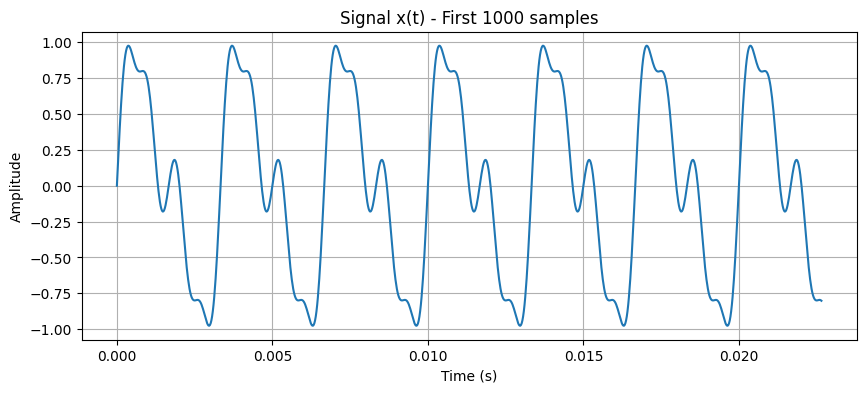

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(t[:1000], signal[:1000])
plt.title("Signal x(t) - First 1000 samples")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

X_mask = (t >= 0.01) & (t <= 0.02)



# EX 3

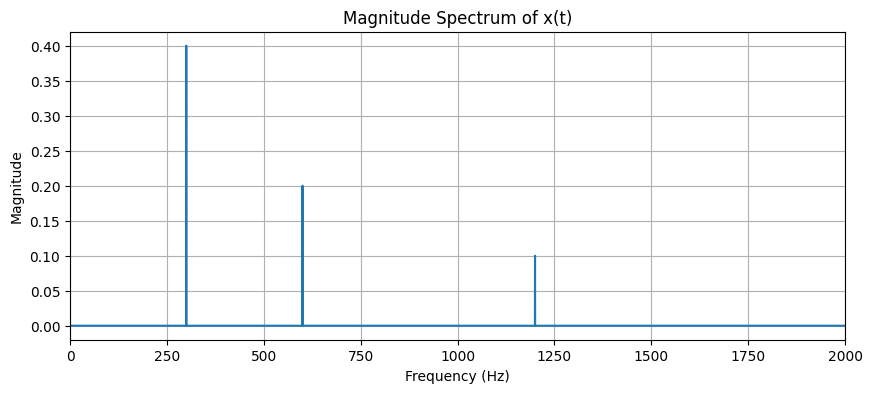

In [31]:
from numpy.fft import fft, fftfreq
X_f = fft(signal)
frequencies = fftfreq(N, 1/Fe)
magnitude = np.abs(X_f) / N
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:N//2], magnitude[:N//2])
plt.title("Magnitude Spectrum of x(t)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.xlim(0, 2000)
plt.show()

# EX 4

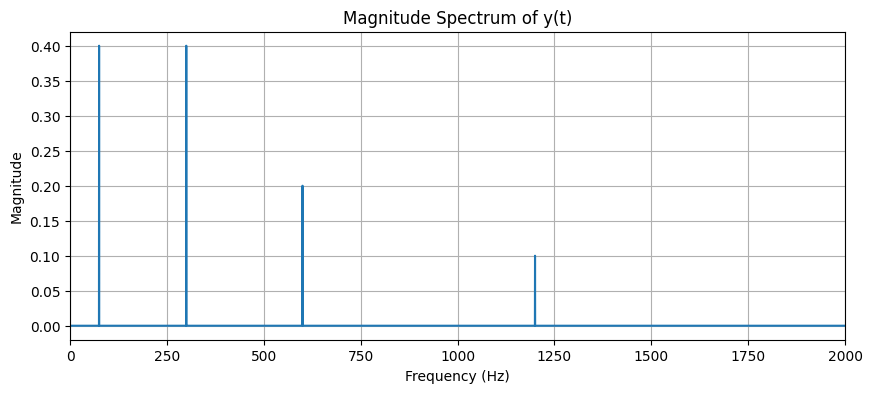

In [32]:
def y(t):
    return x(t) + 0.8*np.sin((np.pi/2)*300*t)

signal_y = y(t)
Y_f = fft(signal_y)
magnitude_y = np.abs(Y_f) / N
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:N//2], magnitude_y[:N//2])
plt.title("Magnitude Spectrum of y(t)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.xlim(0, 2000)
plt.show()